Introduction to Matplotlib
===================

## Overview
- Introduction to Matplotlib

- Basic plots

## Acknowledgments
- Some of the examples in this unit are taken from: [Python Crash Course - A Hands-on, Project-based, introduction to programming](https://www.amazon.co.uk/Python-Crash-Course-Hands-Project-Based/dp/1593276036)
  
- This slide deck is also inspired on Jake VanderPlas' _Python Data Science Handbook_,  [Chapter 4](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
  
- This unit was created with the immense help of [Mr. Jomar Alcantara](https://github.com/joealcantara/) from Aston University, UK.


## What is Matplotlib

- `Matplotlib` is a data visualization library built on `NumPy` arrays, originally conceived in 2002 to enable interactive, Matlab-style plotting in IPython.

- In recent years, however, the interface and style of the basic `matplotlib` have begun to show their age, particularly when compared against R's `ggplot` and `ggvis`, as well as web visualisation toolkits like `D3js`

- As a response, recent `matplotlib` versions have focused on easily changing global plotting styles, and new packages are available that couple `matplotlib`'s powerful internals with cleaner, more modern APIs. Possibly the most well-known example is `Seaborn`, which we'll be using here. 


## Matplotlib in Jupyter Notebooks

- `Matplotlib` was designed for, and is still most often used in, interactive Python sessions. Currently the most common example of these are JupyterLab Notebooks, such as this one.

- To set up `matplotlib` for interactive use, we need to import it and tell the interactive session how we want it to behave:

In [19]:
# Only useful if you want to output the graph to the Python notebook
%matplotlib inline 

# Import general modules
import pandas as pd
import numpy  as np

# Import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt # Pyplot is such a general function that it deserves its own alias

- After importing the required modules, it is often useful to configure the behaviour of matplotlib (and that of Pandas, while we're at it):

In [20]:
# Set max row display
pd.set_option('display.max_row', 200)

# Set max column width for output
pd.set_option('display.max_columns', 60)

# Set the plotting style (or theme) you would like to use.
plt.style.use('classic')

- There are a number of styles that are available. You access the full list using `plt.style.available`.

- We'll explore a few of these, but feel free to change them using `plt.style.use()` to get more familiar with how they generally look.


In [21]:
plt.style.available[:]

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## Simple line plots

- One of the simplest types of plots is the _line plot_, which is useful e.g. to visualise a single function $y = f(x)$. 

- All `matplotlib` plots start with the creation of a figure and a set of axes. In their simplest form, these can be created using `figure()` and `axes()`:

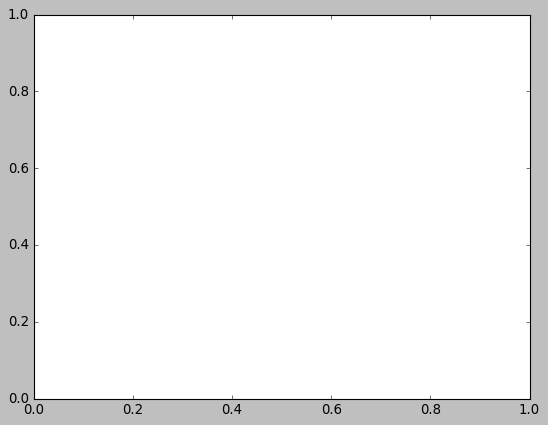

In [22]:
fig = plt.figure()
ax  = plt.axes()

- This creates an empty plot, which is in some senses similar to what `ggplot2`'s function `ggplot()` creates in R. 

- In `Matplotlib`, the **figure** can be seen as a container that will receive all the objects representing axes, graphics, text, and labels.

- The **axes** are what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.

- Once the `axes` have been created, they can start receiving some plotting elements. For instance, let's examine the sine function between 0 and $2\pi$:

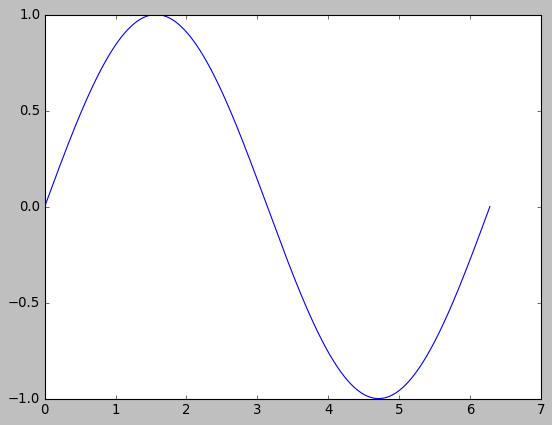

In [23]:
fig = plt.figure()
ax  = plt.axes()
x = np.linspace(0, 2 * np.pi, 1000)
ax.plot(x, np.sin(x));

- A common shortcut is to invoke the `pyplot` function (which, you'll recall, was imported *as* `plt`) and let it take care of generating the figure and axes in the background.

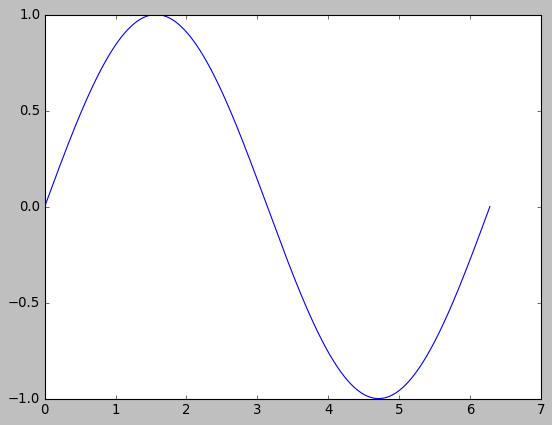

In [24]:
plt.plot(x, np.sin(x));

- To add multiple graphical components to a plot, we can simply call `plt.plot()` multiple times.

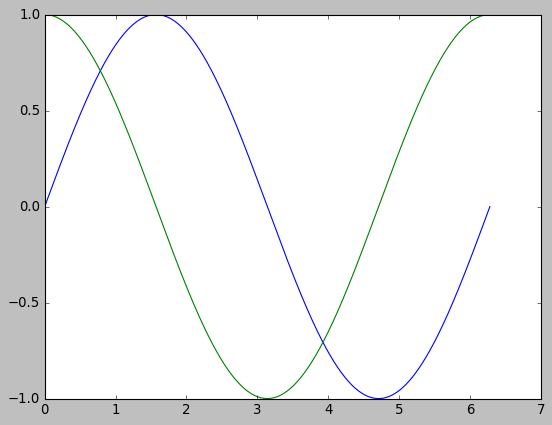

In [25]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

## Adjusting line colour and style

- The first (and simplest) adjustment we often do is to change line colours and styles. This can be done by passing additional arguments to `plt.plot()`. 

- Colours are adjusted using the `color` argument (unlike `ggplot2`, which takes both American and British spellings due to Hadley Wickham's proud NZ origins, `matplotlib` is firmly on the western side of the Atlantic language divide). Colours can be passed as normalised RGB tuples, #RRGGBB hex codes, by plain colour name, HTML colour name, etc.

- If no `color` is passed, `plt.plot()` automatically cycles through a set of default colours.

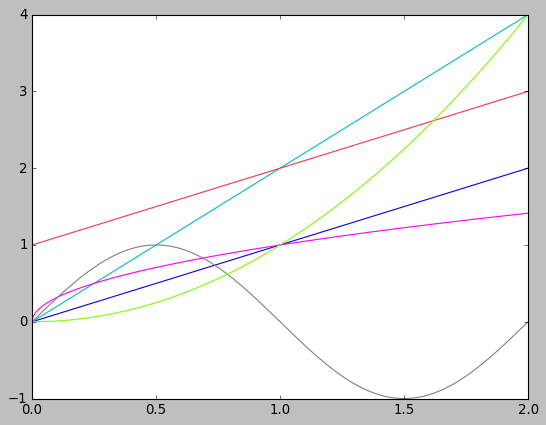

In [26]:
x = np.linspace(0, 2, 1000)
plt.plot(x, x, color = 'blue')                    # plain colour name
plt.plot(x, 2 * x, color = 'c')                   # short color code (rgbcmyk)
plt.plot(x, x + 1, color = (1.0,0.2,0.3))         # RGB tuple, values 0 to 1
plt.plot(x, np.sqrt(x), color = '#FF00FF')        # #RRGGBB hex codes [#000000, #FFFFFF]
plt.plot(x, np.sin(np.pi * x), color = '.5')      # Normalised grayscale: [0, 1]
plt.plot(x, x ** 2, color = 'chartreuse');        # all HTML color names supported

- Similarly, the line style can be adjusted using the optional `linestyle` argument:

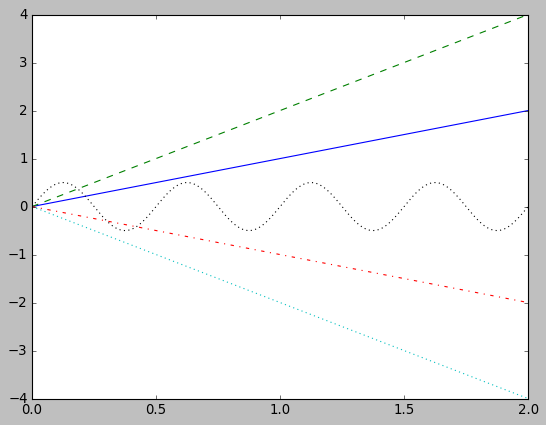

In [27]:
plt.plot(x, x + 0, linestyle = 'solid')   # alias: linestyle = '-'
plt.plot(x, 2 * x, linestyle = 'dashed')  # alias: linestyle = '--'
plt.plot(x, -x, linestyle = 'dashdot')    # alias: linestyle = '-.'
plt.plot(x, -2 * x, linestyle = 'dotted') # alias: linestyle = ':'

# You can also combine colours and linetypes, Matlab style
plt.plot(x, 0.5 * np.sin(4 * np.pi * x), 'k:'); 

## Adjusting plotting limits

- Another common adjustment that is often required is to manually set the limits of the plotting windows (e.g., zooming in or out to improve the quality of a given visualisation).

- This can be easily done in `matplotlib` using `plt.xlim()` and `plt.ylim()`

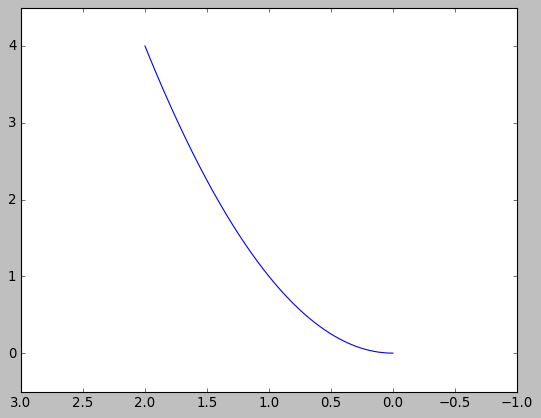

In [28]:
plt.plot(x, x ** 2)
plt.ylim(-0.5, 4.5)
plt.xlim(3, -1);    # if we invert the limits we can revert the axis

- A useful related method is `plt.axis()`, which allows you to set the x and y limits with a single call:

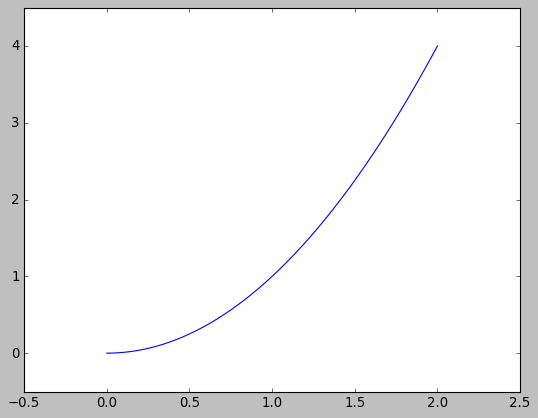

In [29]:
plt.plot(x, x ** 2)
plt.axis([-0.5, 2.5, -0.5, 4.5]);

- `plt.axis()` also allows us to automatically tighten the axes bounds around the current plot (using `plt.axis('tight')`), or to set the aspect ratio of the plot to unity, using: 

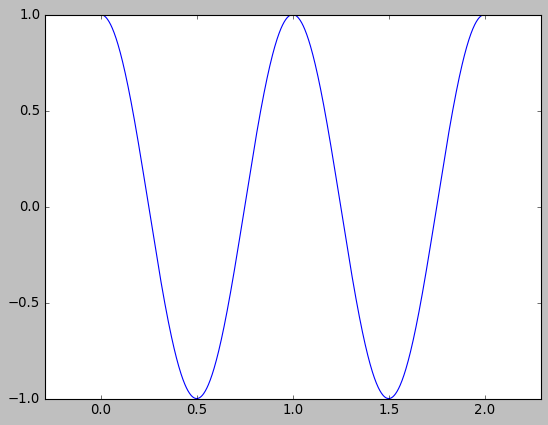

In [30]:
plt.plot(x, np.cos(2 * np.pi * x))
plt.axis('equal');

## Setting plot labels

- Labelling in `matplotlib` refers to setting plot titles, axis labels, and legends. 

- Titles and axis labels can be easily set up using specific methods:

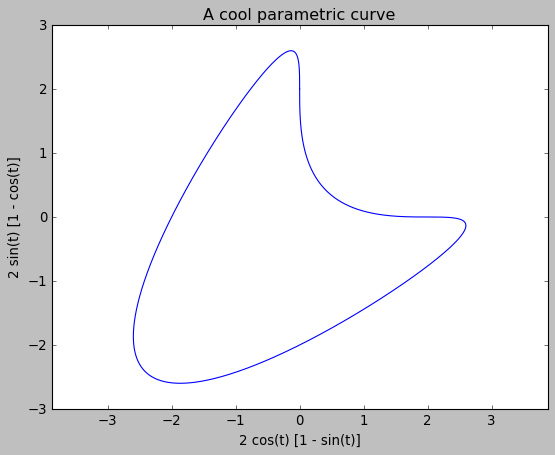

In [31]:
t = np.linspace(0, 2 * np.pi, 1000)
x = 2 * (1 - np.cos(t)) * np.sin(t)
y = 2 * (1 - np.sin(t)) * np.cos(t)
plt.plot(x, y)
plt.axis('equal')
plt.title('A cool parametric curve') # args loc, pad, and fontdict are available
plt.xlabel('2 cos(t) [1 - sin(t)]')
plt.ylabel('2 sin(t) [1 - cos(t)]');

- Several optional arguments can be passed to these three functions to control position, font size, color, transparency, font face, etc. The documentation of these functions (e.g., see [plt.title()](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.title.html)) is quite informative in this regard.

- When multiple lines are being shown within a single axes, it is often useful to create a legend identifying each curve. `Matplotlib` has a built-in method `plt.legend()` that takes care of it.

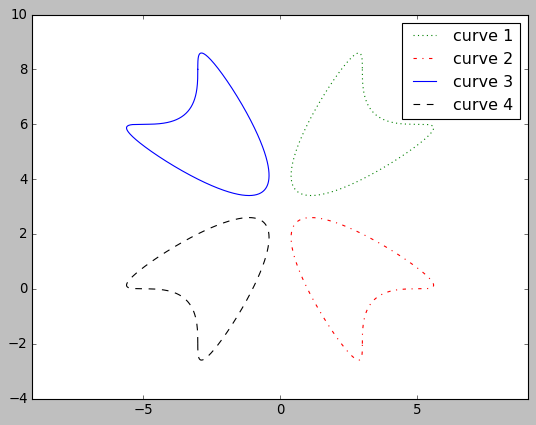

In [32]:
# Notice that each plot receives a label when it is created.
plt.plot(x + 3, y + 6, ':g', label = 'curve 1')
plt.plot(x + 3, -y, '-.r', label = 'curve 2')
plt.plot(-x - 3, y + 6, '-b', label = 'curve 3')
plt.plot(-x - 3, -y, '--k', label = 'curve 4')
plt.axis('equal')
plt.legend();

## Some small peculiarities

- While most `plt` functions translate directly to ax methods (e.g. `plt.plot()` as `ax.plot()`), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified (this is important when working, e.g., with subplots). 

- For transitioning between procedural functions and object-oriented methods, just make the following adjustments:
    - `plt.xlabel()` becomes `ax.set_xlabel()` (same thing for `ylabel`)
    - `plt.xlim()` becomes `ax.set_xlim()` (same thing for `ylim`)
    - `plt.title()` becomes `ax.set_title()`

- Also, when using the object-oriented approach, it is often more convenient to simply use the `ax.set()` method to set all these properties at once, e.g.:

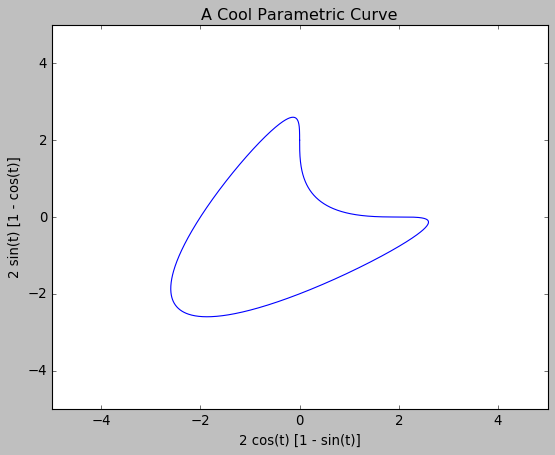

In [33]:
ax = plt.axes()
ax.plot(x, y)
ax.set(xlim = (-5, 5), ylim = (-5, 5),
       xlabel = '2 cos(t) [1 - sin(t)]', 
       ylabel = '2 sin(t) [1 - cos(t)]',
       title = 'A Cool Parametric Curve');

## Scatter plots

- Another very common plot that can be generated using `plt.plot()` is the scatter plot. As we saw in our `ggplot2` unit, this is a pretty useful yet simple plot type that allows us to visualise the relationsihp between two (and sometimes more) numerical variables.

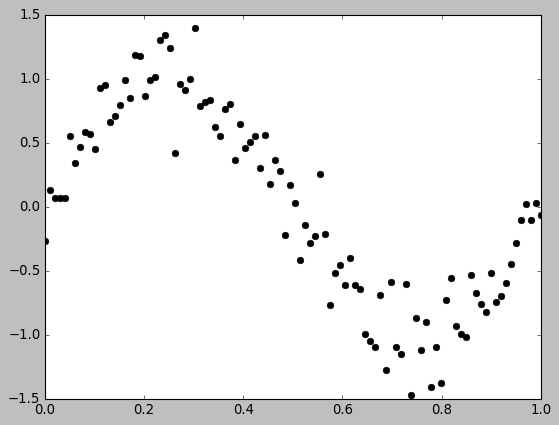

In [34]:
x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x) + 0.2 * np.random.randn(100) # Simulate a noisy signal

plt.plot(x, y, 'o', color='black');

- The third argument in the call to `plt.plot()` is a character that represents the type of symbol used for plotting. The marker style has its own set of short string codes (see [here](https://matplotlib.org/3.1.0/api/markers_api.html) for the full list).

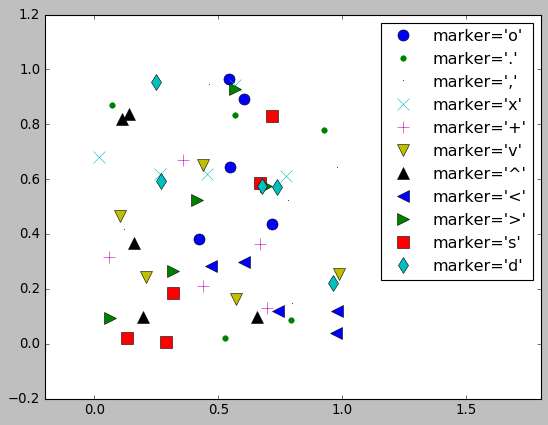

In [35]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']: # There are many more!
    plt.plot(rng.rand(5), rng.rand(5), marker, 
             markersize = 10,
             label = "marker='{0}'".format(marker))
plt.legend(numpoints = 1)
plt.axis([-0.2, 1.8, -0.2, 1.2]);

- It is also possible to use the usual Matlab style to combine points and lines:

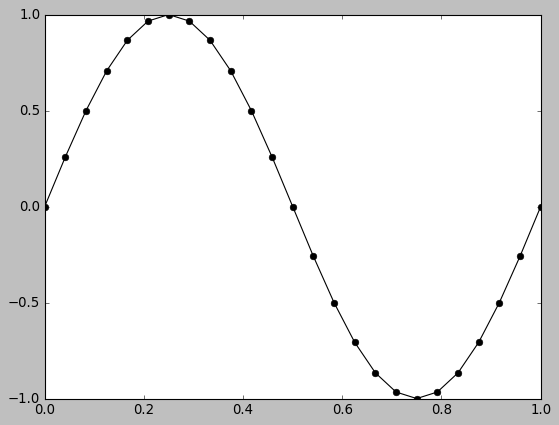

In [36]:
Npts = 25
x = np.linspace(0, 1, Npts)
y = np.sin(2 * np.pi * x)
plt.plot(x, y, '-ok');

- Or, if you want different properties for the points and lines, plot them sequentially:

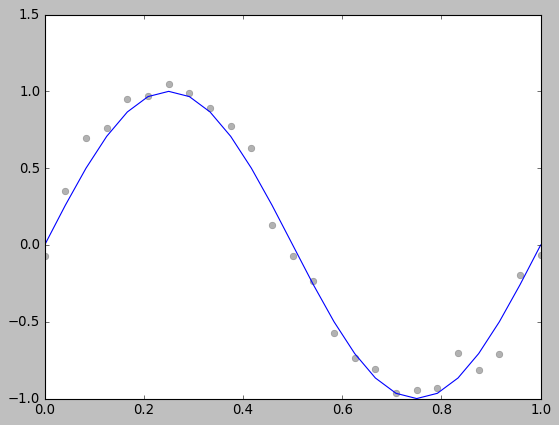

In [37]:
y2 = y + 0.1 * np.random.randn(Npts)           # add some noise to the points in y
plt.plot(x, y2, 'o', color = 'k', alpha = 0.3) # plot the noisy points in (semitransparent) black
plt.plot(x, y, '-b');                          # Add the generating function as a blue line on top

- Additional keyword arguments to `plt.plot()` specify a wide range of properties of the lines and markers:

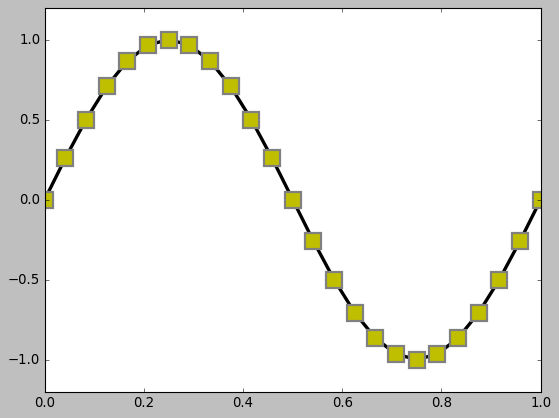

In [38]:
plt.plot(x, y, '-s', 
         color = 'k',              # (Line) colour
         markersize = 15,          # Point size
         linewidth = 3,            # Line thickness
         markerfacecolor = 'y',    # fill colour of points
         markeredgecolor = 'gray', # edge colour of markers
         markeredgewidth = 2)      # thickness of marker edges
                                   # and many more...
plt.ylim(-1.2, 1.2);

- A more powerful method of creating scatter plots is `plt.scatter()`, which shares many similarities with `plt.plot()`:

- The main difference between the two is that `plt.scatter()` can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

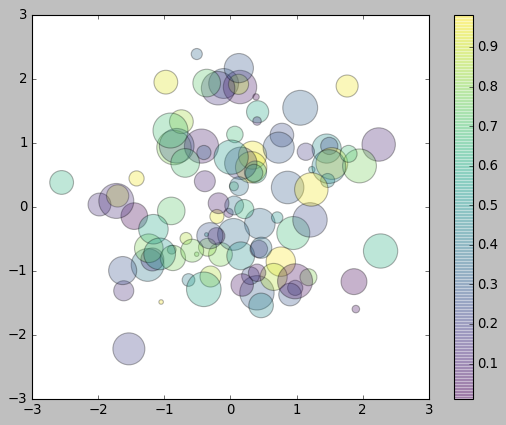

In [40]:
rng = np.random.RandomState(0) # rng contains a powerful PRNG
# Generate 100 randomly (Gaussian) spread points
x = rng.randn(100)
y = rng.randn(100)

# 100 randomly (uniform, [0, 1]) colors
colors = rng.rand(100)
# And 100 randomly (uniform, [0, 1000]) sizes
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, 
            c = colors, 
            s = sizes, 
            alpha = 0.3,
            cmap = 'viridis') # viridis color pallette

plt.colorbar();  # show color scale

- Notice that the color argument is automatically mapped to a color scale, shown here by `plt.colorbar()`, and that the size argument is given in pixels. 

- In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.